# T2 - Plotting, printing, and saving

This tutorial provides a brief overview of options for plotting results, printing objects, and saving results.

<div class="alert alert-info">
    
Click [here](https://mybinder.org/v2/gh/institutefordiseasemodeling/covasim/HEAD?urlpath=lab%2Ftree%2Fdocs%2Ftutorials%2Ftut_plotting.ipynb) to open an interactive version of this notebook.
    
</div>

## Global plotting configuration

Covasim allows the user to set various options that apply to all plots. You can change the font size, default DPI, whether plots should be shown by default, etc. (for the full list, see `cv.options.help()`). For example, we might want higher resolution, to turn off automatic figure display, close figures after they're rendered, and to turn off the messages that print when a simulation is running. We can do this using built-in defaults for Jupyter notebooks (and then run a sim) with:

In [1]:
import covasim as cv

cv.options(jupyter=True, verbose=0) # Standard options for Jupyter notebook
sim = cv.Sim()
sim.run()

Covasim 3.1.4 (2022-10-22) — © 2020-2022 by IDM


Sim(<no label>; 2020-03-01 to 2020-04-30; pop: 20000 random; epi: 12730⚙, 14☠)

## Printing objects

There are three levels of detail available for most objects (sims, multisims, scenarios, and people). The shortest is `brief()`:

In [2]:
sim.brief()

Sim(<no label>; 2020-03-01 to 2020-04-30; pop: 20000 random; epi: 12730⚙, 14☠)


You can get more detail with `summarize()`:

In [3]:
sim.summarize()

Simulation summary:
       12,730 cumulative infections
          596 cumulative reinfections
       10,182 cumulative infectious
        6,395 cumulative symptomatic cases
          386 cumulative severe cases
          114 cumulative critical cases
        5,159 cumulative recoveries
           14 cumulative deaths
            0 cumulative tests
            0 cumulative diagnoses
            0 cumulative known deaths
            0 cumulative quarantined people
            0 cumulative isolated people
            0 cumulative vaccine doses
            0 cumulative vaccinated people



Finally, to show the full object, including all methods and attributes, use `disp()`:

In [4]:
sim.disp()

————————————————————————————————————————————————————————————
Methods:
  _brief()            finalize_analyz...  plot()              
  _disp()             finalize_interv...  plot_result()       
  _get_ia()           get_analyzer()      rescale()           
  brief()             get_analyzers()     reset_layer_pars()  
  calibrate()         get_intervention()  result_keys()       
  compute_doubling()  get_interventio...  run()               
  compute_fit()       init_analyzers()    save()              
  compute_gen_time()  init_immunity()     set_metadata()      
  compute_r_eff()     init_infections()   set_seed()          
  compute_results()   init_interventi...  shrink()            
  compute_states()    init_people()       step()              
  compute_summary()   init_results()      summarize()         
  compute_yield()     init_variants()     to_df()             
  copy()              initialize()        to_excel()          
  date()              layer_keys()        to_jso

## Plotting options

While a sim can be plotted using default settings simply by `sim.plot()`, this is just a small fraction of what's available. First, note that results can be plotted directly using e.g. Matplotlib. You can see what quantities are available for plotting with `sim.results.keys()` (remember, it's just a dict). A simple example of plotting using Matplotlib is:

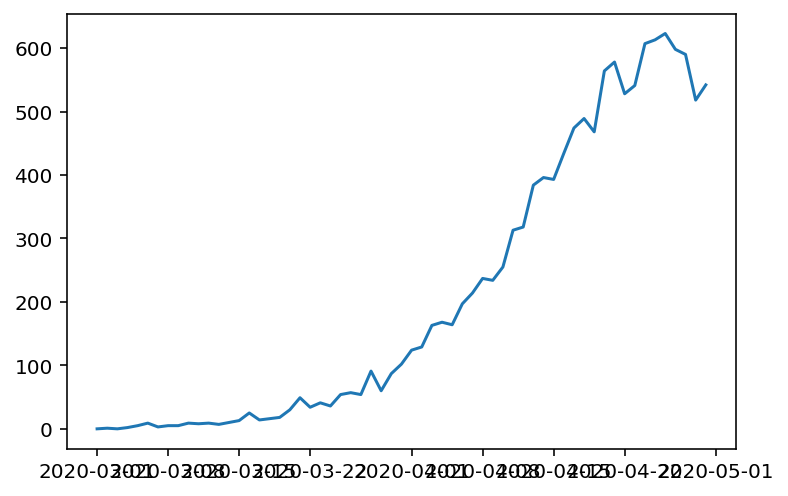

In [5]:
import pylab as pl # Shortcut for import matplotlib.pyplot as plt
pl.plot(sim.results['date'], sim.results['new_infections'])

However, as you can see, this isn't ideal since the default formatting is...not great. (Also, note that each result is a `Result` object, not a simple Numpy array; like a pandas dataframe, you can get the array of values directly via e.g. `sim.results.new_infections.values`.)

An alternative, if you only want to plot a single result, such as new infections, is to use the `plot_result()` method:

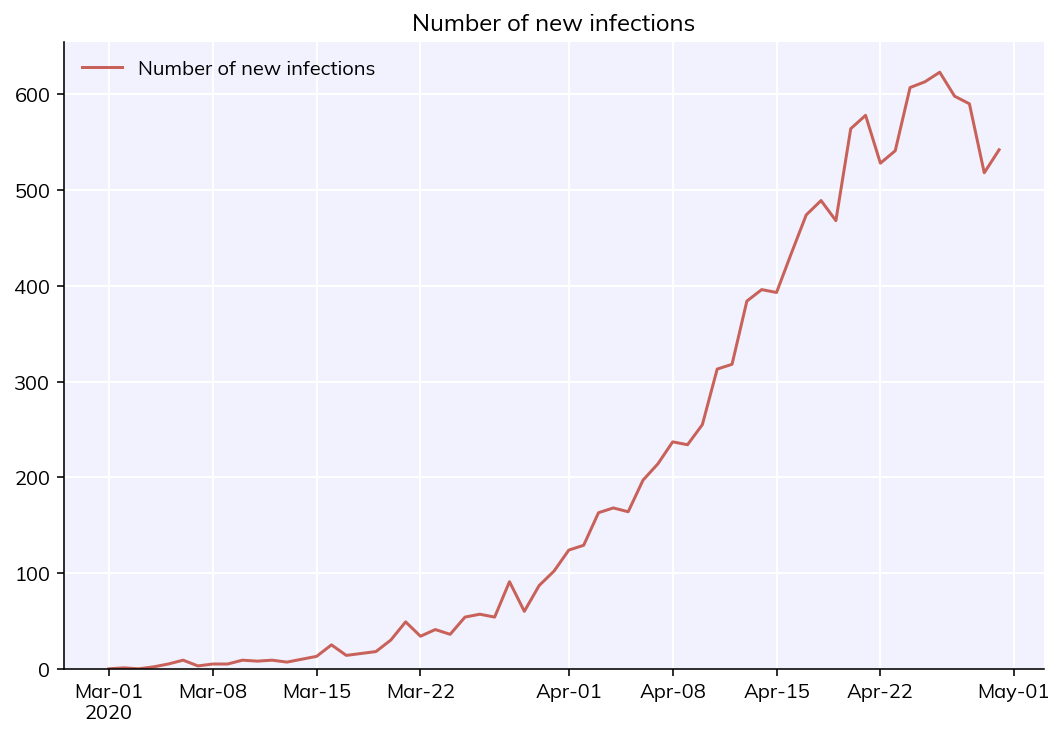

In [6]:
sim.plot_result('new_infections')

You can also select one or more quantities to plot with the first (`to_plot`) argument, e.g.

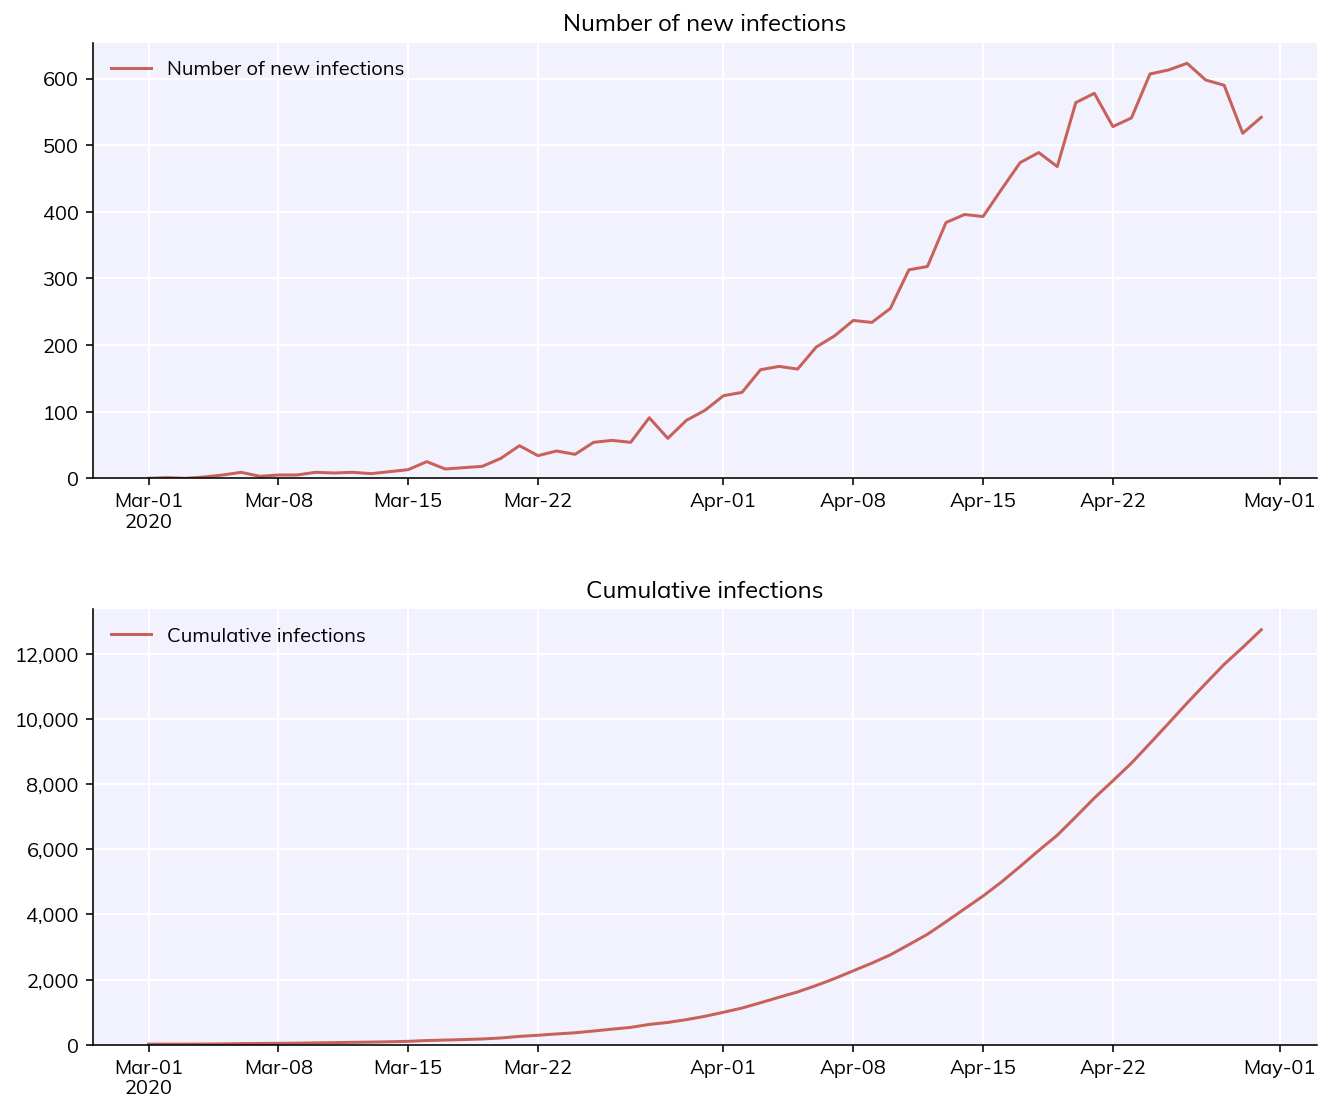

In [7]:
sim.plot(to_plot=['new_infections', 'cum_infections'])

Another useful option is to plot an overview of everything in a simulation. We can do this with the `to_plot='overview'` argument. It's quite a lot of information so we might also want to make a larger figure for it, which we can do by passing additional arguments (which, if recognized, are passed to `pl.figure()`). We can also change the date format between `'sciris'` (the default), `'concise'` (better for cramped plots), and `'matplotlib'` (Matplotlib's default):

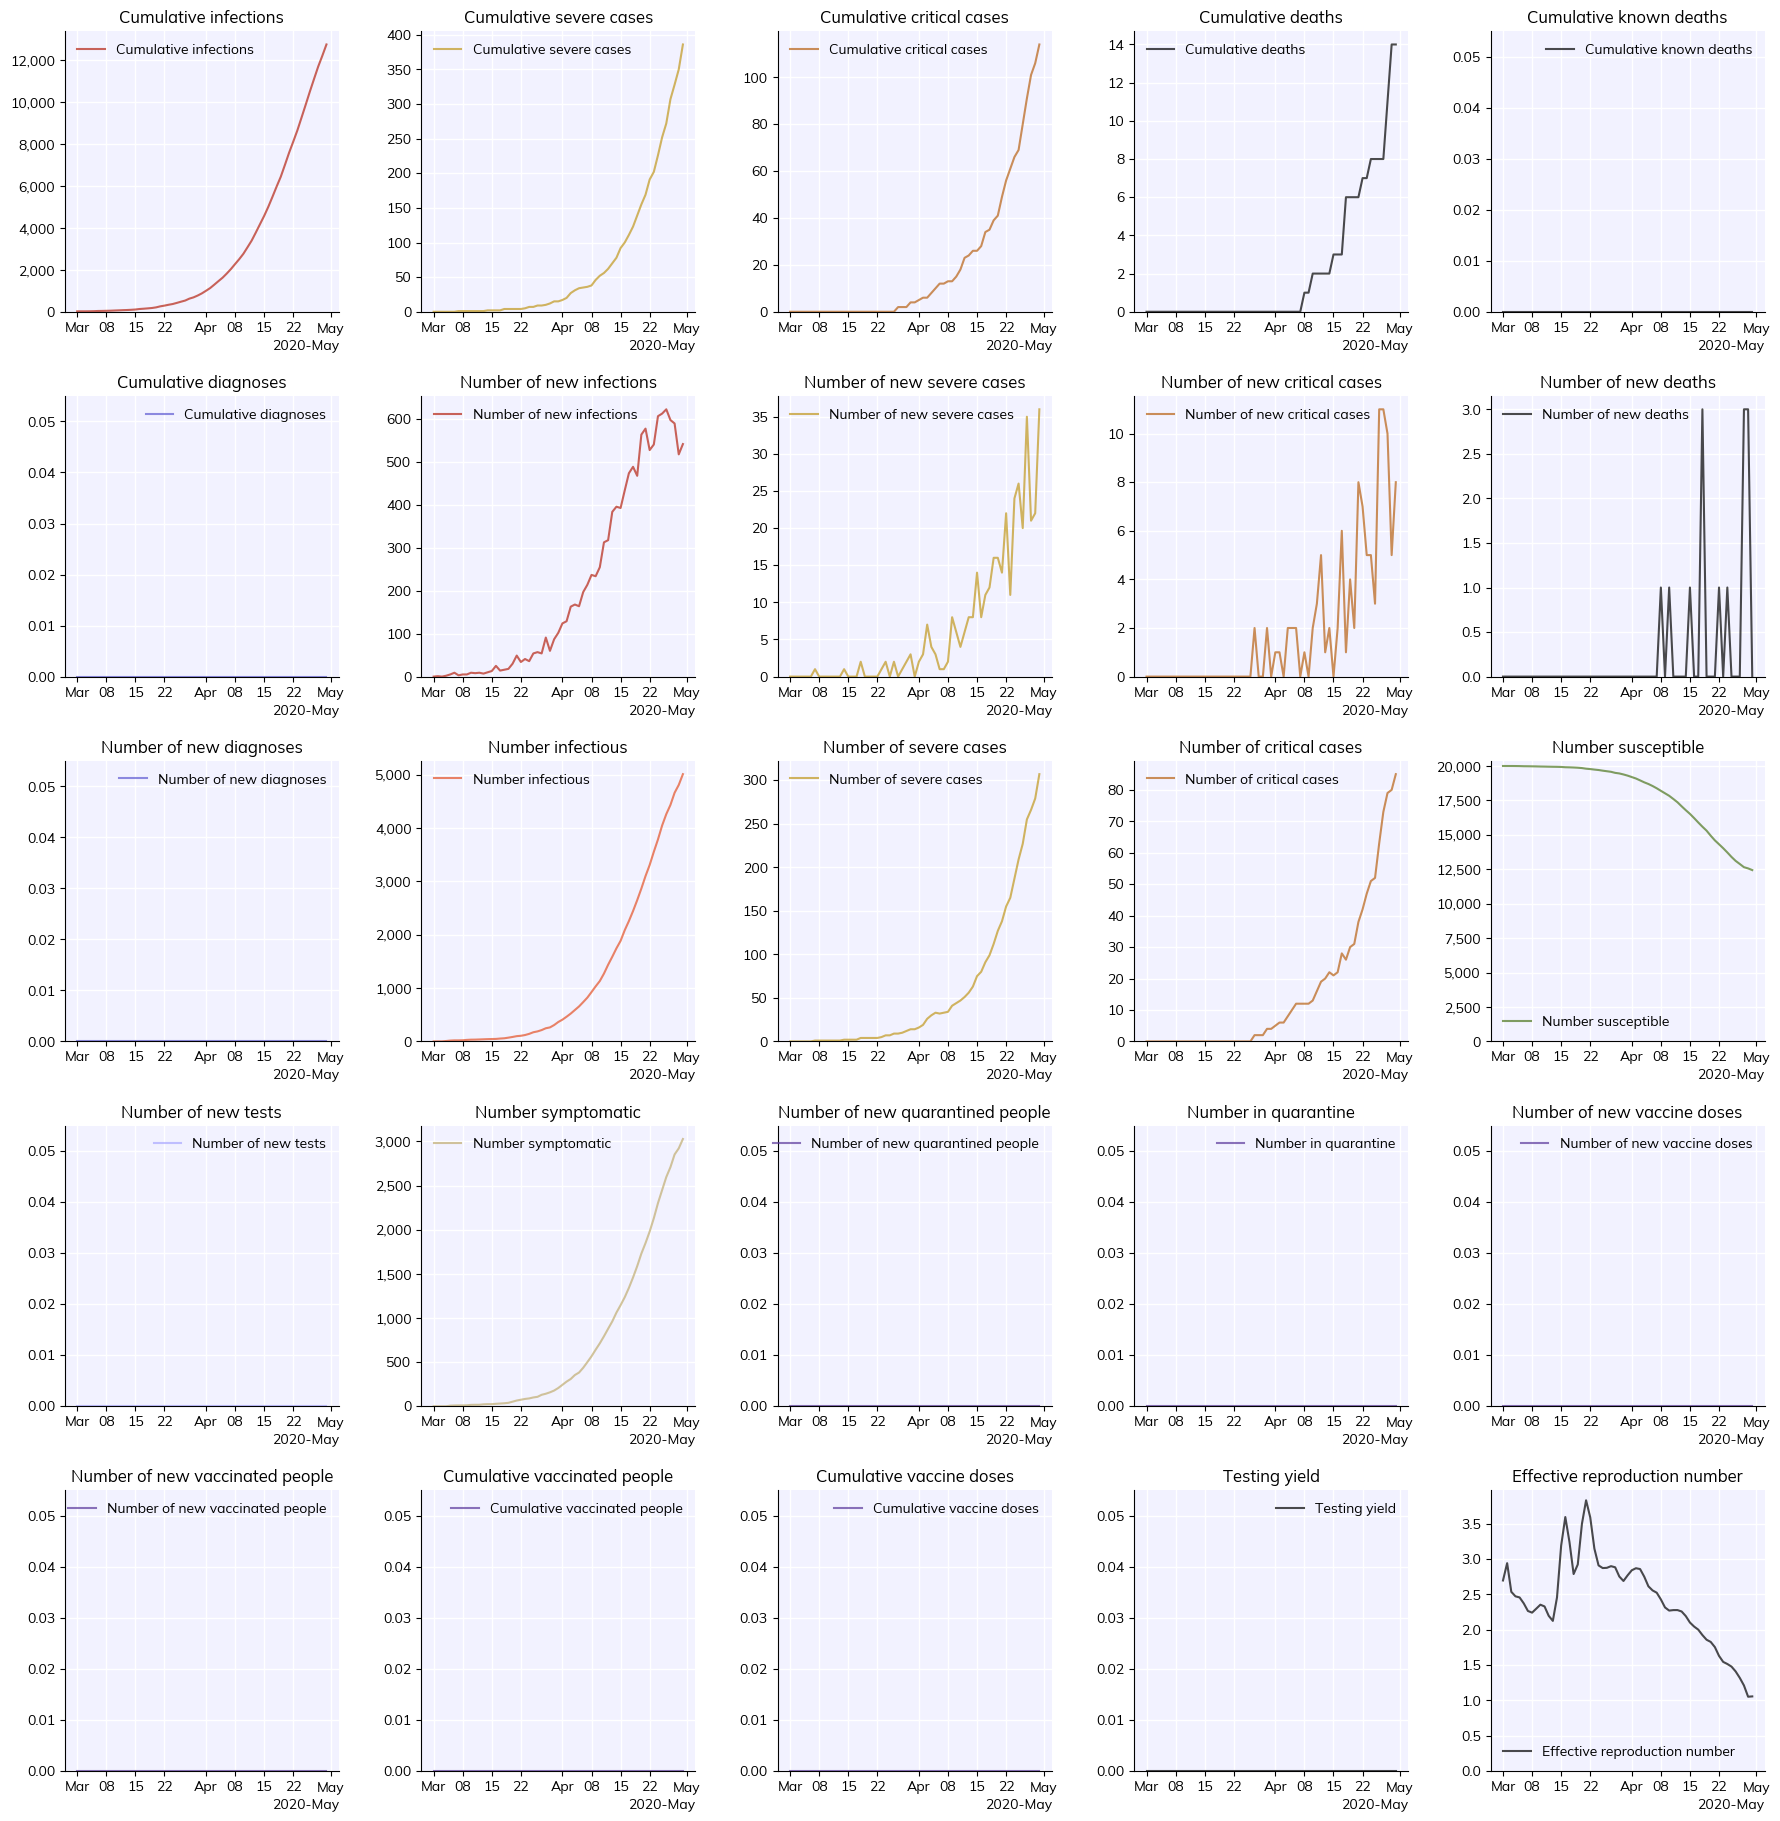

In [8]:
sim.plot('overview', n_cols=5, figsize=(20,20), dateformat='concise', dpi=50) # NB: dateformat='concise' is already the default for >2 columns

While we can save this figure using Matplotlib's built-in `savefig()`, if we use Covasim's `cv.savefig()` we get a couple advantages:

In [9]:
cv.savefig(filename='my-fig.png')

'my-fig.png'

<Figure size 432x288 with 0 Axes>

First, it saves the figure at higher resolution by default (which you can adjust with the `dpi` argument). But second, it stores information about the code that was used to generate the figure as metadata, which can be loaded later. Made an awesome plot but can't remember even what script you ran to generate it, much less what version of the code? You'll never have to worry about that again. 

In [10]:
cv.get_png_metadata('my-fig.png')

Covasim version: 3.1.4
Covasim branch: Branch N/A
Covasim hash: Hash N/A
Covasim date: Date N/A
Covasim caller branch: Branch N/A
Covasim caller hash: Hash N/A
Covasim caller date: Date N/A
Covasim caller filename: /Users/erinstafford/opt/anaconda3/lib/python3.9/site-packages/covasim/misc.py
Covasim current time: 2023-Mar-10 14:10:06
Covasim calling file: /var/folders/v4/9_v3y8qx7lvdyy9kw19dbfzm0000gn/T/ipykernel_95539/1033588508.py


## Customizing plots

We saw above how to set default plot configuration options for Jupyter. Covasim provides a lot of flexibility in customizing the appearance of plots as well. There are three different levels at which you can set plotting options: global, just for Covasim, or just for the current plot. To give an example with changing the figure DPI:
- Change the setting globally (for both Covasim and Matplotlib): `sc.options(dpi=150)` or `pl.rc('figure', dpi=150)` (where `sc` is `import sciris as sc`)
- Change for Covasim plots, but not for Matplotlib plots: `cv.options(dpi=150)`
- Change for the current Covasim plot, but not other Covasim plots: `sim.plot(dpi=150)`

The easiest way to change the style of Covasim plots is with the `style` argument. For example, to plot using a built-in Matplotlib style would simply be:

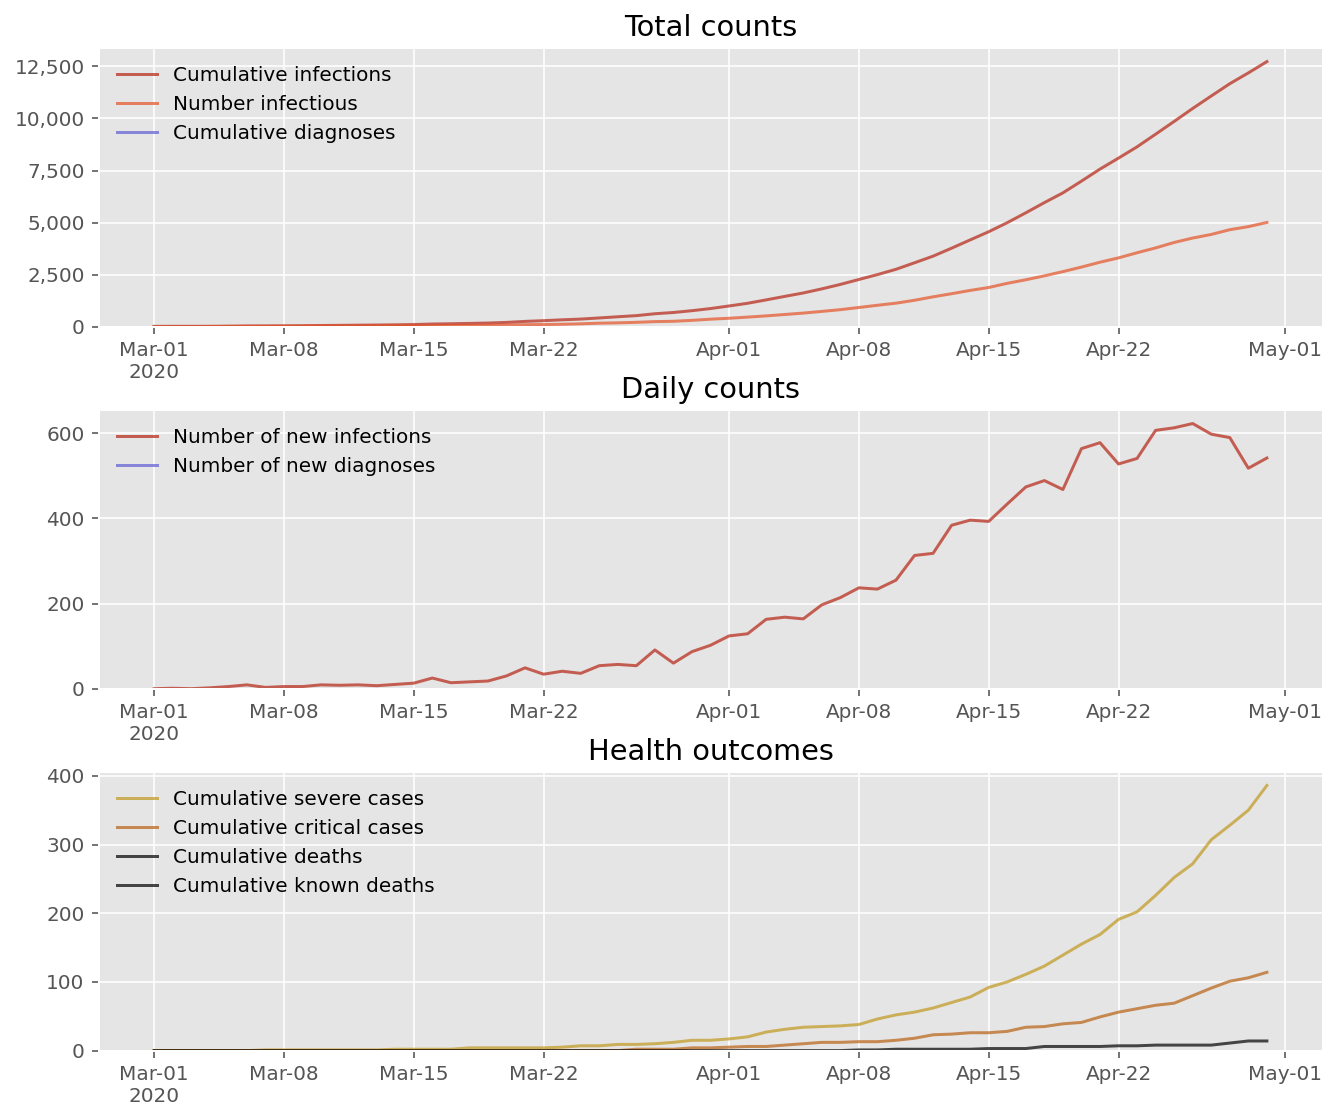

In [11]:
sim.plot(style='ggplot')

In addition to the default style (`'covasim'`), there is also a "simple" style. You can combine built-in styles with additional overrides, including any valid Matplotlib commands:

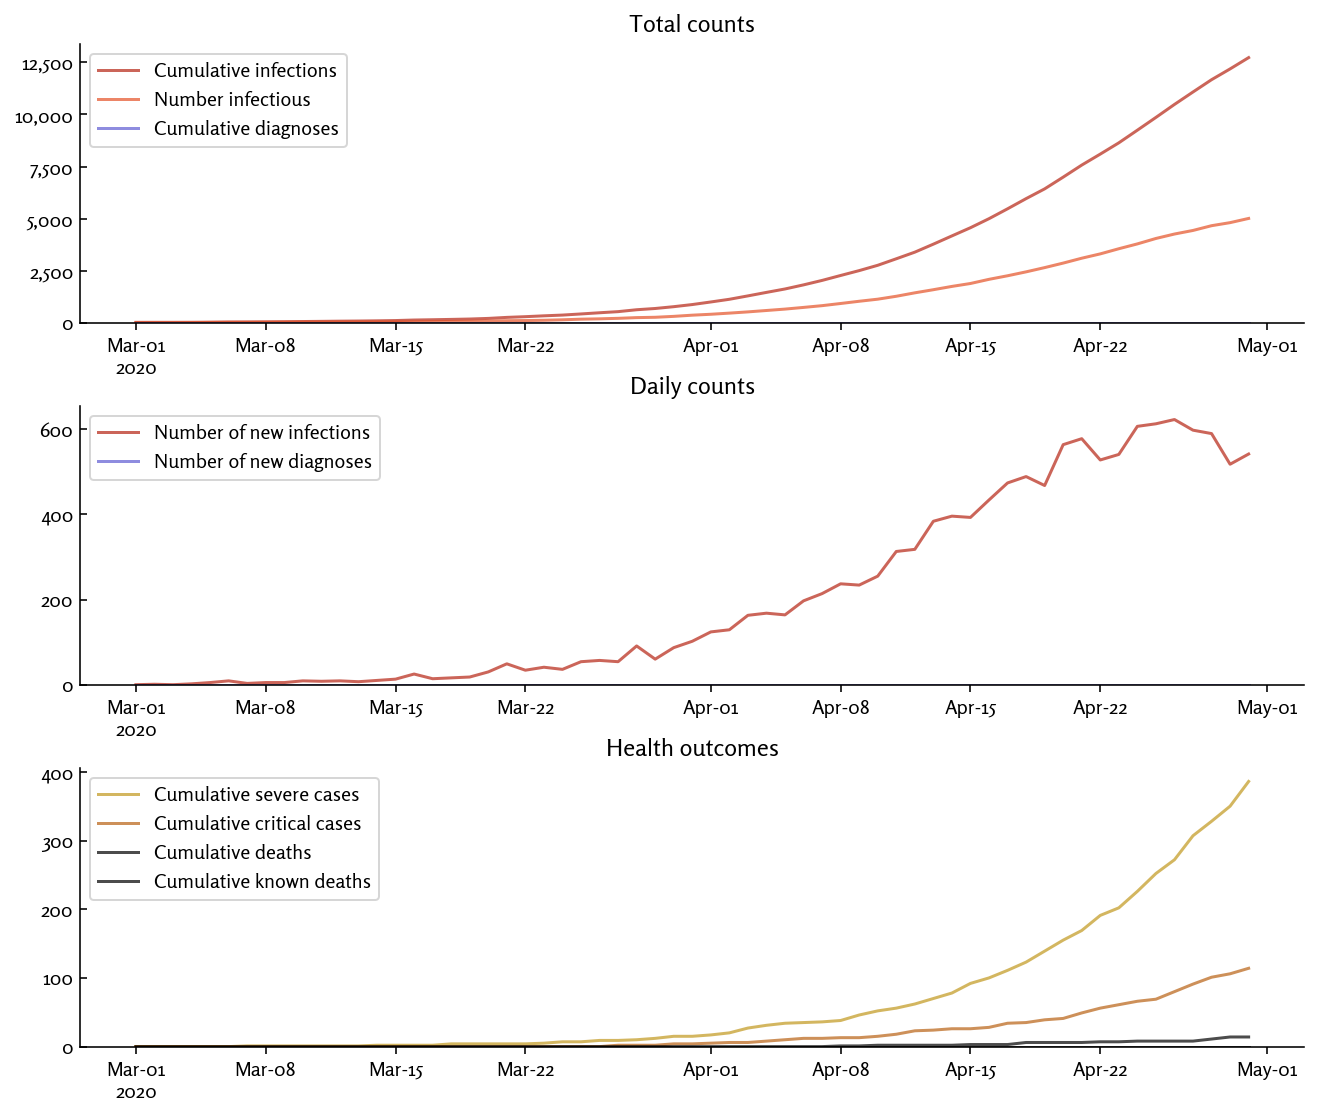

In [12]:
sim.plot(style='simple', font='Rosario', legend_args={'frameon':True}, style_args={'ytick.direction':'in'})

(Note: Covasim comes bundled with two fonts, [Mulish](https://github.com/googlefonts/mulish) (sans-serif, the default) and [Rosario](https://fonts.adobe.com/fonts/rosario) (serif).)

Although most style handling is done automatically, you can also use it yourself in a with block, e.g.:

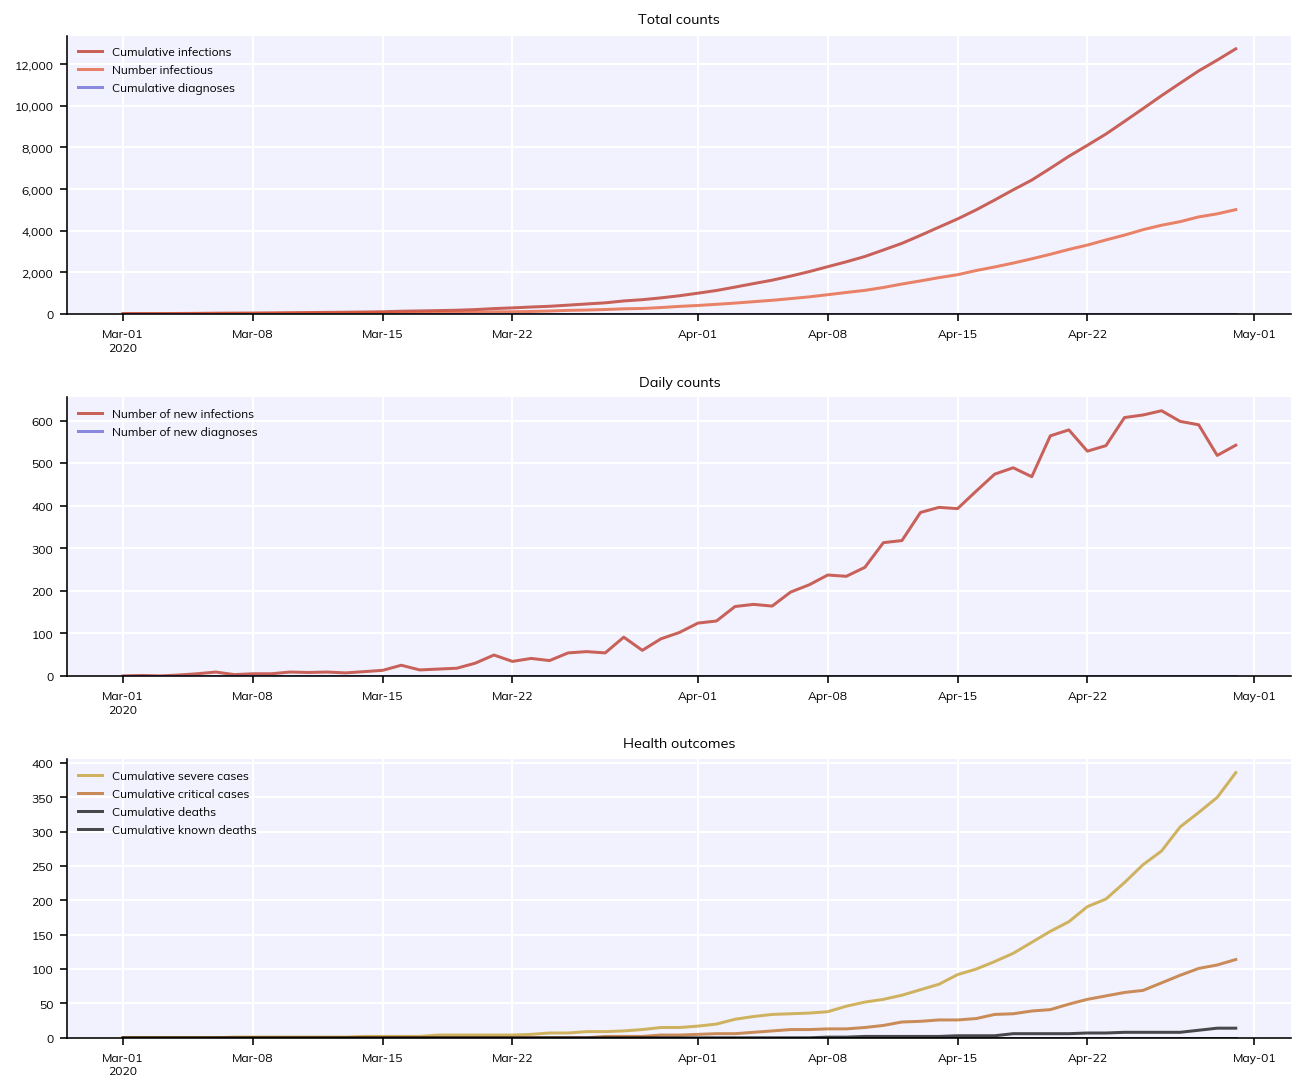

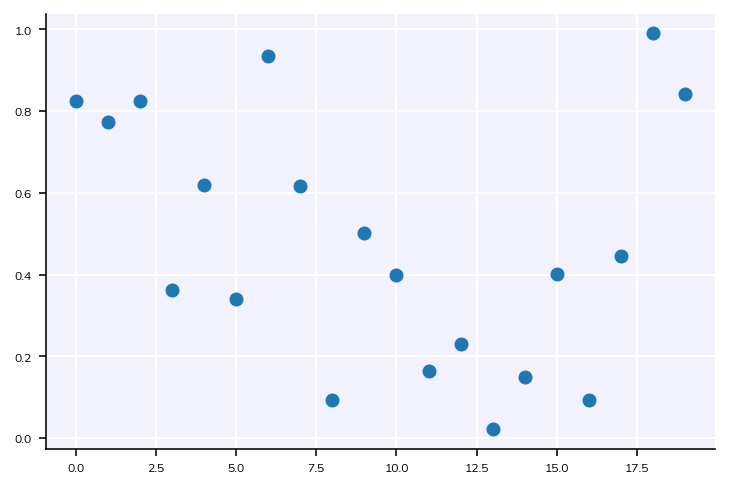

In [13]:
with cv.options.with_style(fontsize=6):
    sim.plot() # This will have 6 point font
    pl.figure(); pl.plot(pl.rand(20), 'o') # So will this

## Saving options

Saving sims is also pretty simple. The simplest way to save is simply

In [14]:
sim.save('my-awesome-sim.sim')

'/Users/erinstafford/Desktop/covasim-main/docs/tutorials/my-awesome-sim.sim'

Technically, this saves as a gzipped pickle file (via `sc.saveobj()` using the Sciris library). By default this does not save the people in the sim since they are very large (and since, if the random seed is saved, they can usually be regenerated). If you want to save the people as well, you can use the `keep_people` argument. For example, here's what it would look like to create a sim, run it halfway, save it, load it, change the overall transmissibility (beta), and finish running it:

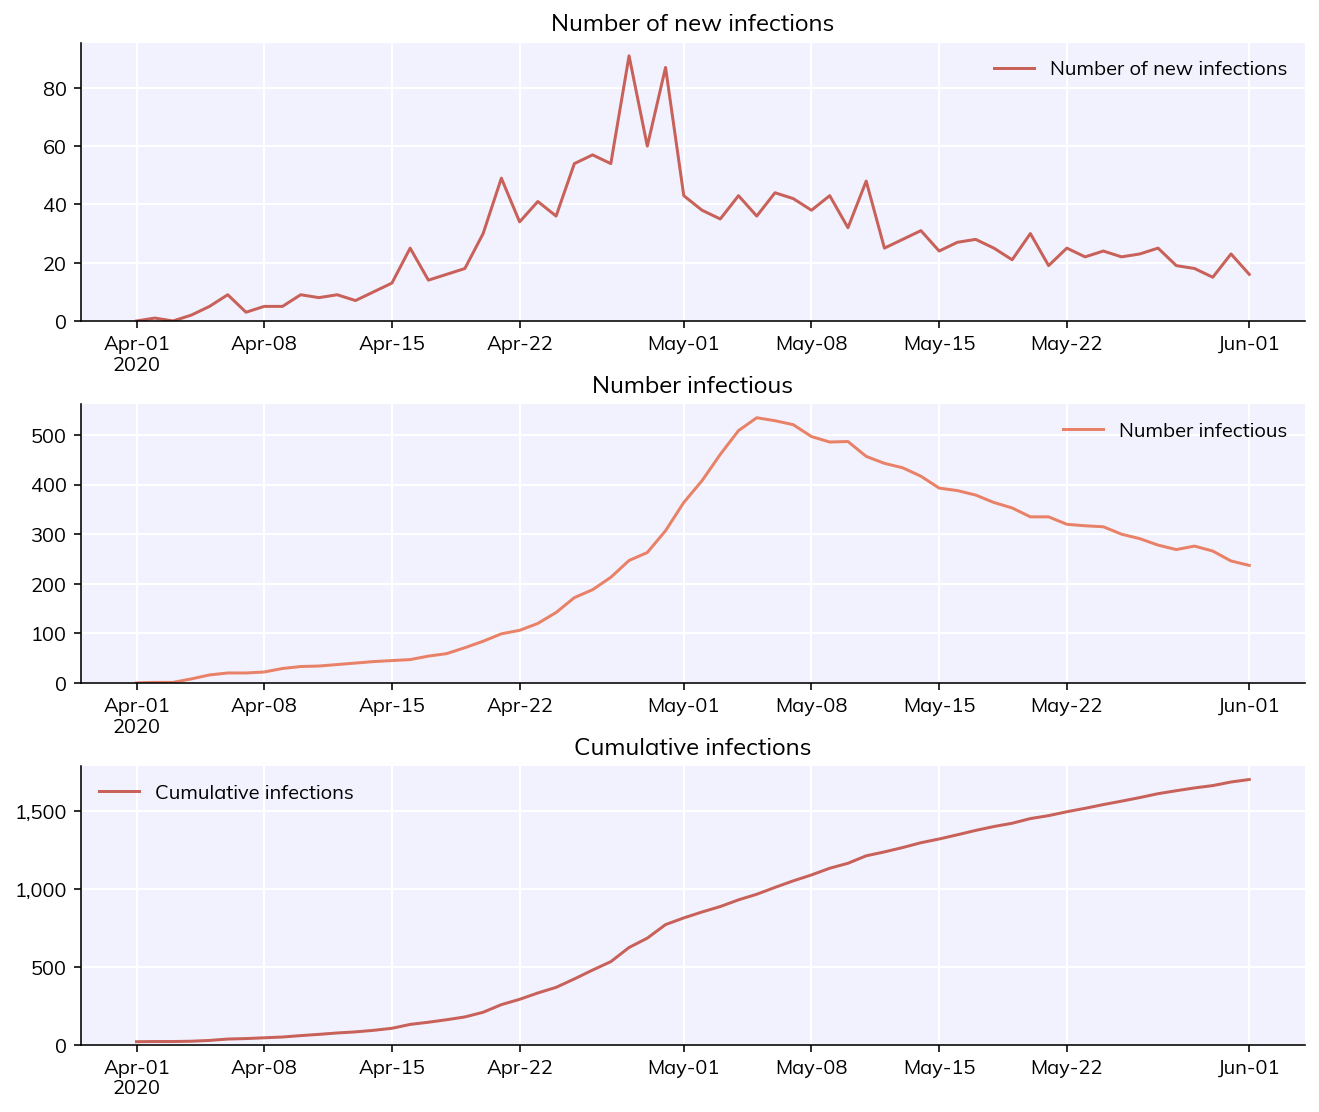

In [15]:
sim_orig = cv.Sim(start_day='2020-04-01', end_day='2020-06-01', label='Load & save example')
sim_orig.run(until='2020-05-01')
sim_orig.save('my-half-finished-sim.sim') # Note: Covasim always saves the people if the sim isn't finished running yet

sim = cv.load('my-half-finished-sim.sim')
sim['beta'] *= 0.3
sim.run()
sim.plot(['new_infections', 'n_infectious', 'cum_infections'])

Aside from saving the entire simulation, there are other export options available. You can export the results and parameters to a JSON file (using `sim.to_json()`), but probably the most useful is to export the results to an Excel workbook, where they can easily be stored and processed with e.g. Pandas:

In [16]:
import pandas as pd

sim.to_excel('my-sim.xlsx')
df = pd.read_excel('my-sim.xlsx')
print(df)

Object saved to /Users/erinstafford/Desktop/covasim-main/docs/tutorials/my-sim.xlsx.
         date   t  cum_infections  cum_reinfections  cum_infectious  \
0  2020-04-01   0              20                 0               0   
1  2020-04-02   1              21                 0               1   
2  2020-04-03   2              21                 0               1   
3  2020-04-04   3              23                 0               8   
4  2020-04-05   4              28                 0              16   
..        ...  ..             ...               ...             ...   
57 2020-05-28  57            1632                25            1527   
58 2020-05-29  58            1650                25            1561   
59 2020-05-30  59            1665                25            1579   
60 2020-05-31  60            1688                25            1596   
61 2020-06-01  61            1704                26            1615   

    cum_symptomatic  cum_severe  cum_critical  cum_recoveries 